## EDA for the gesture data set
* Explora data
* Visualize samples
* Prepare features
* Train sample model
* Evaluate

#### preparing the dataset

In [96]:
import zipfile
import os

import numpy as np
import patoolib
import shutil

In [104]:
# Extract the single file
raw_data_path = "../data/raw/uWaveGestureLibrary.zip"
extracted_data_path = "../data/raw/"
extracted_data_small_path = "../data/extracted/"
# with zipfile.ZipFile(raw_data_path, 'r') as zip_ref:
#     zip_ref.extractall(extracted_data_path)

In [111]:
%%capture
# Extract small files
small_zips = os.listdir(extracted_data_path)
for small_zip in small_zips:
    if small_zip.endswith(".rar"):
        folder_name = small_zip.rstrip(".rar")
        small_zip_path = os.path.join(extracted_data_path, small_zip)
        small_zip_out_path = os.path.join(extracted_data_small_path, folder_name)
        shutil.rmtree(small_zip_out_path)
        os.mkdir(small_zip_out_path)
        patoolib.extract_archive(small_zip_path, outdir=small_zip_out_path);

patool: Extracting ../data/raw/U2 (2).rar ...
patool: running /usr/bin/unrar x -- "/home/j3/Desktop/gesture-recognition/data/raw/U2 (2).rar"
patool:     with cwd='../data/extracted/U2 (2)'
patool: ... ../data/raw/U2 (2).rar extracted to `../data/extracted/U2 (2)'.
patool: Extracting ../data/raw/U4 (3).rar ...
patool: running /usr/bin/unrar x -- "/home/j3/Desktop/gesture-recognition/data/raw/U4 (3).rar"
patool:     with cwd='../data/extracted/U4 (3)'
patool: ... ../data/raw/U4 (3).rar extracted to `../data/extracted/U4 (3)'.
patool: Extracting ../data/raw/U4 (1).rar ...
patool: running /usr/bin/unrar x -- "/home/j3/Desktop/gesture-recognition/data/raw/U4 (1).rar"
patool:     with cwd='../data/extracted/U4 (1)'
patool: ... ../data/raw/U4 (1).rar extracted to `../data/extracted/U4 (1)'.
patool: Extracting ../data/raw/U2 (3).rar ...
patool: running /usr/bin/unrar x -- "/home/j3/Desktop/gesture-recognition/data/raw/U2 (3).rar"
patool:     with cwd='../data/extracted/U2 (3)'
patool: ... ../d

### Clean data

In [195]:
# combine data into a csv file for analysis and modeling
import pandas as pd
import re
from tqdm import tqdm

def user_gesture_folder_to_df(folder_path):
    columns = ["user_id", "day", "template", "file_name", "gesture_id", "repetition", "X", "Y", "Z"]
    df = pd.DataFrame(columns=columns)
    user_id = re.search(r"U\d", folder_path).group(0)
    day = re.search(r"\((\d)\)", folder_path).group(1)

    for txt_file in tqdm(os.listdir(folder_path)):
        if "Template_Acceleration" in txt_file:
            template = txt_file[0]
            gesture_id = re.search(r"Acceleration(\d)", txt_file).group(1)
            try:
                repetition = re.search(r"Acceleration\d-(\d)", txt_file).group(1)
            except Exception as e:
                repetition = -1
            txt_df = pd.read_csv(os.path.join(folder_path, txt_file), sep=" ", names=["X", "Y", "Z"])
            x = txt_df.X.to_numpy()
            y = txt_df.Y.to_numpy()
            z = txt_df.Z.to_numpy()

            tmp_df = pd.DataFrame([[user_id, day, template, txt_file, gesture_id, repetition, x, y, z]], columns=columns)
            df = pd.concat([df, tmp_df])

    return df

clean_df = pd.DataFrame()

for folder_ in os.listdir(extracted_data_small_path):
    folder_path = os.path.join(extracted_data_small_path, folder_)
    df = user_gesture_folder_to_df(folder_path)

    clean_df = pd.concat([clean_df, df])


100%|██████████| 127/127 [00:00<00:00, 1821.27it/s]


In [196]:
clean_df.head()

,user_id,day,template,file_name,gesture_id,repetition,X,Y,Z
0,U3,4,E,E_Template_Acceleration1-7.txt,1,7,"[-0.03846154, -0.03846154, -0.03846154, -0.038...","[-0.2307692, -0.2307692, -0.2307692, -0.230769...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."
0,U3,4,E,E_Template_Acceleration5-9.txt,5,9,"[-0.3461539, -0.3461539, -0.3461539, -0.346153...","[0.2307692, 0.2307692, 0.2307692, 0.2307692, 0...","[1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.32,..."
0,U3,4,E,E_Template_Acceleration5-4.txt,5,4,"[-0.1538462, -0.1538462, -0.1538462, -0.153846...","[0.3461539, 0.3461539, 0.3461539, 0.3461539, 0...","[1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.28,..."
0,U3,4,E,E_Template_Acceleration5-5.txt,5,5,"[-0.03846154, -0.03846154, -0.03846154, -0.038...","[0.5384616, 0.5384616, 0.5384616, 0.5384616, 0...","[0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, ..."
0,U3,4,E,E_Template_Acceleration7-10.txt,7,1,"[0.03846154, 0.03846154, 0.03846154, 0.0384615...","[0.3461539, 0.3461539, 0.3461539, 0.3461539, 0...","[0.72, 0.72, 0.72, 0.72, 0.72, 0.72, 0.72, 0.7..."


In [238]:
# save the clean data
clean_data_path = "../data/clean/"
# clean_df.to_csv(os.path.join(clean_data_path, "gestures_clean.csv"), index=False) # Saves arrays as str, when reading causing problems
clean_df.to_pickle(os.path.join(clean_data_path, "gestures_clean.pkl"))

### Explore data

In [239]:
gestures_df = pd.read_pickle("../data/clean/gestures_clean.pkl")

In [240]:
gestures_df.head()

,user_id,day,template,file_name,gesture_id,repetition,X,Y,Z
0,U3,4,E,E_Template_Acceleration1-7.txt,1,7,"[-0.03846154, -0.03846154, -0.03846154, -0.038...","[-0.2307692, -0.2307692, -0.2307692, -0.230769...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."
0,U3,4,E,E_Template_Acceleration5-9.txt,5,9,"[-0.3461539, -0.3461539, -0.3461539, -0.346153...","[0.2307692, 0.2307692, 0.2307692, 0.2307692, 0...","[1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.32,..."
0,U3,4,E,E_Template_Acceleration5-4.txt,5,4,"[-0.1538462, -0.1538462, -0.1538462, -0.153846...","[0.3461539, 0.3461539, 0.3461539, 0.3461539, 0...","[1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.28,..."
0,U3,4,E,E_Template_Acceleration5-5.txt,5,5,"[-0.03846154, -0.03846154, -0.03846154, -0.038...","[0.5384616, 0.5384616, 0.5384616, 0.5384616, 0...","[0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, ..."
0,U3,4,E,E_Template_Acceleration7-10.txt,7,1,"[0.03846154, 0.03846154, 0.03846154, 0.0384615...","[0.3461539, 0.3461539, 0.3461539, 0.3461539, 0...","[0.72, 0.72, 0.72, 0.72, 0.72, 0.72, 0.72, 0.7..."


In [241]:
gestures_df = gestures_df
gestures_df["x_count"] = gestures_df.X.apply(lambda x: len(x))
gestures_df["y_count"] = gestures_df.Y.apply(lambda x: len(x))
gestures_df["z_count"] = gestures_df.Z.apply(lambda x: len(x))

In [249]:
gestures_df.shape

(4481, 12)

In [250]:
gestures_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4481 entries, 0 to 0
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     4481 non-null   object
 1   day         4481 non-null   object
 2   template    4481 non-null   object
 3   file_name   4481 non-null   object
 4   gesture_id  4481 non-null   object
 5   repetition  4481 non-null   object
 6   X           4481 non-null   object
 7   Y           4481 non-null   object
 8   Z           4481 non-null   object
 9   x_count     4481 non-null   int64 
 10  y_count     4481 non-null   int64 
 11  z_count     4481 non-null   int64 
dtypes: int64(3), object(9)
memory usage: 455.1+ KB


In [252]:
gestures_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
x_count,4481.0,99.347244,47.731391,1.0,66.0,88.0,127.0,315.0
y_count,4481.0,99.347244,47.731391,1.0,66.0,88.0,127.0,315.0
z_count,4481.0,99.347244,47.731391,1.0,66.0,88.0,127.0,315.0


In [254]:
# Some files have only 1 data point. Need to be cleaned
gestures_df[gestures_df["x_count"] == 1]

,user_id,day,template,file_name,gesture_id,repetition,X,Y,Z,x_count,y_count,z_count
0,U3,3,E,E_Template_Acceleration7-5.txt,7,5,[-0.1153846],[0.4230769],[0.92],1,1,1
0,U7,6,R,R_Template_Acceleration1-5.txt,1,5,[-0.1538462],[-0.1923077],[0.6],1,1,1


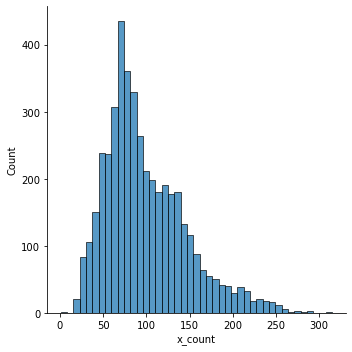

In [264]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.displot(gestures_df['x_count']);

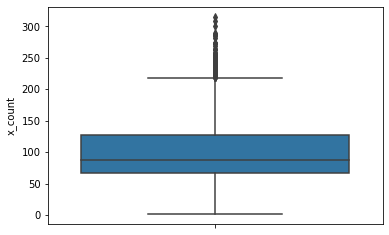

In [266]:
# Check outliers
sns.boxplot(y=gestures_df['x_count']);

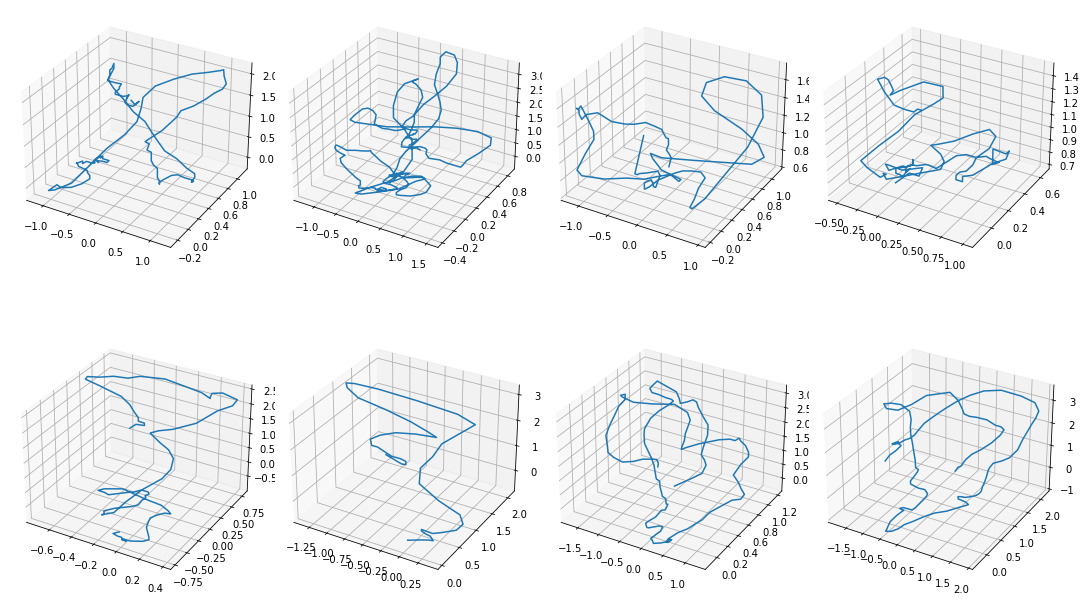

In [369]:
# Visualize gestures
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(15, 10))

for i in range(1,9):
    ax = fig.add_subplot(2, 4, i, projection='3d')

    sample = gestures_df[gestures_df["gesture_id"] == str(i)]
    zline = sample.iloc[0].Z
    xline = sample.iloc[0].X
    yline = sample.iloc[0].Y
    ax.plot(xline, yline, zline)

plt.tight_layout()
# plt.show()



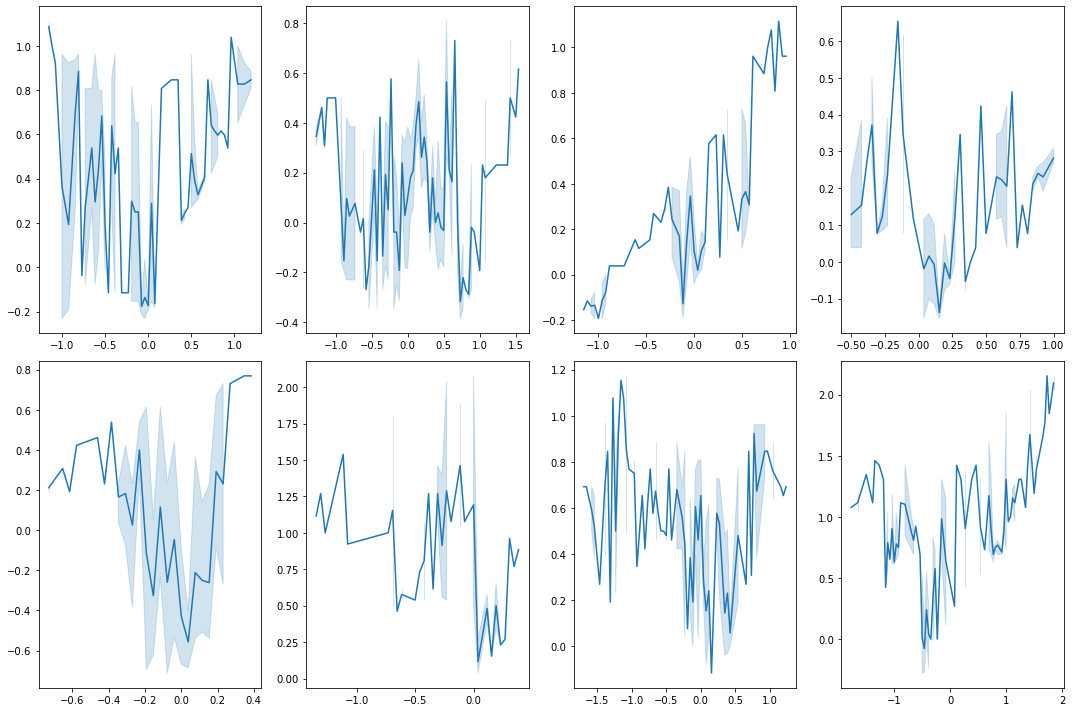

In [321]:
# Visualize 2d figures
fig = plt.figure(figsize=(15, 10))

for i in range(1,9):
    sample = gestures_df[gestures_df["gesture_id"] == str(i)]
    fig.add_subplot(2, 4, i)
    x = sample.iloc[0].X
    y = sample.iloc[0].Y
    sns.lineplot(x=x,y=y)

plt.tight_layout()
# plt.show()

## Modeling

In [363]:
gestures_df_train_test = gestures_df.copy()
gestures_df_train_test = gestures_df_train_test.drop(["user_id", "day", "template", "file_name", "repetition", "x_count", "y_count", "z_count"], axis=1)

def flatten_list(list_):
    result = []
    for i in list_:
        result += list(i)
    return result

gestures_df_train_test["features"] = gestures_df_train_test.apply(lambda row: list(zip(row.X, row.Y, row.Z)), axis=1)
gestures_df_train_test["features_flattened"] = gestures_df_train_test["features"].apply(lambda row: flatten_list(row))
gestures_df_train_test = gestures_df_train_test.drop(["X", "Y", "Z", "features"], axis=1)

gestures_df_train_test

,gesture_id,features_flattened
0,1,"[-0.03846154, -0.2307692, 1.0, -0.03846154, -0..."
0,5,"[-0.3461539, 0.2307692, 1.2, -0.3461539, 0.230..."
0,5,"[-0.1538462, 0.3461539, 1.2, -0.1538462, 0.346..."
0,5,"[-0.03846154, 0.5384616, 0.8, -0.03846154, 0.5..."
0,7,"[0.03846154, 0.3461539, 0.72, 0.03846154, 0.34..."
...,...,...
0,7,"[0.5, 0.4230769, 1.16, 0.5, 0.4230769, 1.16, 0..."
0,2,"[0.03846154, 0.1923077, 0.92, 0.03846154, 0.19..."
0,5,"[0.3076923, 0.4615385, 1.36, 0.3076923, 0.4615..."
0,7,"[0.3846154, 0.4615385, 1.08, 0.3846154, 0.4615..."


In [380]:
gestures_X = pd.DataFrame(gestures_df_train_test.features_flattened.tolist())
gestures_X = gestures_X.fillna(0)
gestures_y = gestures_df_train_test["gesture_id"].copy()

In [381]:
gestures_X

,0,1,2,3,4,5,6,7,8,9,...,935,936,937,938,939,940,941,942,943,944
0,-0.038462,-0.230769,1.00,-0.038462,-0.230769,1.00,-0.038462,-0.230769,1.00,-0.038462,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.346154,0.230769,1.20,-0.346154,0.230769,1.20,-0.346154,0.230769,1.20,-0.346154,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.153846,0.346154,1.20,-0.153846,0.346154,1.20,-0.153846,0.346154,1.20,-0.153846,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.038462,0.538462,0.80,-0.038462,0.538462,0.80,-0.038462,0.538462,0.80,-0.038462,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.038462,0.346154,0.72,0.038462,0.346154,0.72,0.038462,0.346154,0.72,0.038462,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4476,0.500000,0.423077,1.16,0.500000,0.423077,1.16,0.500000,0.423077,1.16,0.500000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4477,0.038462,0.192308,0.92,0.038462,0.192308,0.92,0.038462,0.192308,0.92,0.038462,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4478,0.307692,0.461539,1.36,0.307692,0.461539,1.36,0.307692,0.461539,1.36,0.307692,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4479,0.384615,0.461539,1.08,0.384615,0.461539,1.08,0.384615,0.461539,1.08,0.384615,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [382]:
gestures_y

0    1
0    5
0    5
0    5
0    7
    ..
0    7
0    2
0    5
0    7
0    4
Name: gesture_id, Length: 4481, dtype: object

In [383]:
# Train
# Split data into train and test formate
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(gestures_X, gestures_y, test_size=0.3, random_state=7)

In [384]:
from sklearn.linear_model import LogisticRegression

# Train the model on training data
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluate the model on test data
print("Accuracy%:", model.score(X_test, y_test)*100)

Accuracy%: 86.31970260223049


/home/j3/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [398]:
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

# Series to collect accuracy scores for the different algorithms: "algorithm name + score"
scores_compare = pd.Series()
scores_compare.index.name = 'Model'

# Model 1: Linear Regression =================================================
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_val_predictions = linear_model.predict(X_test)
lr_score = linear_model.score(X_test, y_test)*100
scores_compare['LinearRegression'] = lr_score

# Model 2: Decision Trees. Define the model. =============================
dtree_model = DecisionTreeRegressor(random_state=5)
dtree_model.fit(X_train, y_train)
dtree_val_predictions = dtree_model.predict(X_test)
dtree_score = dtree_model.score(X_test, y_test)*100
scores_compare['DecisionTree'] = dtree_score

# Model 3: Random Forest. Define the model. =============================
rf_model = RandomForestRegressor(random_state=5)
rf_model.fit(X_train, y_train)
rf_val_predictions = rf_model.predict(X_test)
rf_score = rf_model.score(X_test, y_test)*100
scores_compare['RandomForest'] = rf_score

# Model 4: Gradient Boosting Regression ==========================================
gbr_model = GradientBoostingRegressor(n_estimators=300, learning_rate=0.05,
                                      max_depth=4, random_state=5)
gbr_model.fit(X_train, y_train)
gbr_val_predictions = gbr_model.predict(X_test)
gbr_score = gbr_model.score(X_test, y_test)*100
scores_compare['GradientBoosting'] = gbr_score


/home/j3/miniconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
<ipython-input-398-81b3a183365d>:17: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  scores_compare = pd.Series()


In [407]:
xg_reg = XGBRegressor(objective ='multi:softmax', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10, num_class=9)
xg_reg.fit(X_train,y_train)
xg_val_predictions = xg_reg.predict(X_test)
xg_score = xg_reg.score(X_test, y_test)*100
scores_compare['XGBoost'] = xg_score

/home/j3/miniconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22:37:19] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softmax' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [408]:
print('Accuracy scores for different algorithms:')
scores_compare.sort_values(ascending = False).round(3)

Accuracy scores for different algorithms:


Model
GradientBoosting       87.538
RandomForest           86.836
XGBoost                79.914
DecisionTree           65.387
LinearRegression   -72564.661
dtype: float64